In [98]:
import numpy as np
import pandas as pd
import pandas_profiling
import seaborn as sns
%matplotlib inline

In [99]:
# Item orders table
orders         = pd.read_csv("olist_orders_dataset.csv")

# Customers are associated to Orders
customers      = pd.read_csv("olist_customers_dataset.csv")

# Payment information for Orders
order_payments = pd.read_csv("olist_order_payments_dataset.csv")

### Remove noise from orders table

In [100]:
orders.info()
print()
print("Unique Order Ids : {}".format(orders.order_id.nunique()))
print("Unique Customer Ids: {}".format(orders.customer_id.nunique()))

# each row of the dataset has uniqueness of order_id and customer_id
# each order has a status, purchase time & estimated delivery date

#ACTION: convert all timestamp columns to datetime type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
order_id                         99441 non-null object
customer_id                      99441 non-null object
order_status                     99441 non-null object
order_purchase_timestamp         99441 non-null object
order_approved_at                99281 non-null object
order_delivered_carrier_date     97658 non-null object
order_delivered_customer_date    96476 non-null object
order_estimated_delivery_date    99441 non-null object
dtypes: object(8)
memory usage: 6.1+ MB

Unique Order Ids : 99441
Unique Customer Ids: 99441


In [129]:
purchase_na = orders.order_purchase_timestamp.isna()
approved_na = orders.order_approved_at.isna()
carrier_na = orders.order_delivered_carrier_date.isna()
customer_na = orders.order_delivered_customer_date.isna()

print("Total Orders: {}".format(orders.shape[0]))
print("Total Purchase: {}".format(orders[~(purchase_na)].shape[0]))
print("purchased, not approved: {}".format(orders[~(purchase_na) & (approved_na)].shape[0]))
print("purchased, approved: {}".format(orders[~(purchase_na) & ~(approved_na)].shape[0]))
print("purchased, approved, not delivered to carrier: {}".format(orders[~(purchase_na) & ~(approved_na) & (carrier_na)].shape[0]))
print("purchased, approved, delivered to carrier: {}".format(orders[~(purchase_na) & ~(approved_na) & ~(carrier_na)].shape[0]))
print("purchased, approved, delivered to carrier, not delivered to customer: {}".format(orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & (customer_na)].shape[0]))
print("purchased, approved, delivered to carrier, delivereed to customer: {}".format(orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & ~(customer_na)].shape[0]))

#Action: select orders which were purchased, approveed, delivered to carrier, delivered to customer

Total Orders: 99441
Total Purchase: 99441
purchased, not approved: 160
purchased, approved: 99281
purchased, approved, not delivered to carrier: 1637
purchased, approved, delivered to carrier: 97644
purchased, approved, delivered to carrier, not delivered to customer: 1183
purchased, approved, delivered to carrier, delivereed to customer: 96461


### Applying actions on orders table

In [133]:
# Select orders which were purchased, approved, delivered to carrier, delivered to customer
od = orders[~(purchase_na) & ~(approved_na) & ~(carrier_na) & ~(customer_na)].copy()

### Set index after removal of data

In [134]:
od.reset_index(inplace=True)
od.drop('index', axis=1, inplace=True)
od

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
7,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
8,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00
9,e6ce16cb79ec1d90b1da9085a6118aeb,494dded5b201313c64ed7f100595b95c,delivered,2017-05-16 19:41:10,2017-05-16 19:50:18,2017-05-18 11:40:40,2017-05-29 11:18:31,2017-06-07 00:00:00


In [135]:
# Convert all date and time coluums to datetime
od['order_purchase_timestamp'] = pd.to_datetime(od['order_purchase_timestamp'], format='%Y-%m-%d %H:%M:%S')
od['order_approved_at'] = pd.to_datetime(od['order_approved_at'], format='%Y-%m-%d %H:%M:%S')
od['order_delivered_carrier_date'] = pd.to_datetime(od['order_delivered_carrier_date'], format='%Y-%m-%d %H:%M:%S')
od['order_delivered_customer_date'] = pd.to_datetime(od['order_delivered_customer_date'], format='%Y-%m-%d %H:%M:%S')
od['order_estimated_delivery_date'] = pd.to_datetime(od['order_estimated_delivery_date'], format='%Y-%m-%d %H:%M:%S')

### Verfify info()

In [136]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96461 entries, 0 to 96460
Data columns (total 8 columns):
order_id                         96461 non-null object
customer_id                      96461 non-null object
order_status                     96461 non-null object
order_purchase_timestamp         96461 non-null datetime64[ns]
order_approved_at                96461 non-null datetime64[ns]
order_delivered_carrier_date     96461 non-null datetime64[ns]
order_delivered_customer_date    96461 non-null datetime64[ns]
order_estimated_delivery_date    96461 non-null datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 5.9+ MB


In [2]:


customers.drop(labels=['customer_unique_id'], axis=1, inplace=True)

#remove all orders which had multiple payments, to keep the primary key as order_id and not have order_id duplicated
multi_payment_order_ids = order_payments[order_payments['payment_sequential']>1]['order_id']
multi_payment_orders_filter = order_payments['order_id'].isin(multi_payment_order_ids)
order_payments = order_payments[~(multi_payment_orders_filter)]
order_payments.drop(labels=['payment_sequential'], axis=1, inplace=True)

orders_data = pd.merge(pd.merge(orders, customers, on='customer_id'), order_payments, on="order_id")

In [5]:
orders_data['customer_zip_code_prefix'] = orders_data['customer_zip_code_prefix'].apply(lambda x: str(x))

In [6]:
pandas_profiling.ProfileReport(orders_data).to_file("orders_data_before.html")

# 1st Observation after profiling
* missing values in order_delivered_carrier_date, order_delivered_customer_date
* 

In [7]:
# Remove duplicate rows
orders_data = orders_data[~(orders_data.duplicated(keep='first'))]

In [8]:
# Find if the missing values are valid
temp = orders_data[orders_data['order_delivered_carrier_date'].isna()]
print(temp.shape[0])
temp.head()

1725


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_type,payment_installments,payment_value
5,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,98900,santa rosa,RS,credit_card,1,65.95
98,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21,88140,santo amaro da imperatriz,SC,boleto,1,50.35
123,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03,3436,sao paulo,SP,credit_card,2,138.28
256,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05,89288,sao bento do sul,SC,credit_card,5,84.00
312,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09,3531,sao paulo,SP,credit_card,1,299.84


In [9]:
# Find if the missing values are valid
orders_data[orders_data['order_delivered_customer_date'].isna()].shape[0]

2877

In [10]:
orders_data[orders_data['order_approved_at'].isna()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_type,payment_installments,payment_value
1096,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12,1151,sao paulo,SP,not_defined,1,0.00
1748,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17,33030,santa luzia,MG,voucher,1,191.46
1812,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10,68742,castanhal,PA,boleto,1,139.96
1967,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13,13059,campinas,SP,voucher,1,66.44
2093,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30,5752,sao paulo,SP,credit_card,2,72.90


* Looks ok to have na values for order_delivered_customer_date & order_delivered_carrier_date
* or since this is less than 10% of the whole data, let's remove them

In [12]:
temp = orders_data['order_delivered_customer_date'].isna()
orders_data = orders_data[~(temp)]
temp = orders_data['order_delivered_carrier_date'].isna()
orders_data = orders_data[~(temp)]
temp = orders_data['order_approved_at'].isna()
orders_data = orders_data[~(temp)]
#only 6 rows out of whole data is canceled, and after removing those rows, the column order_status is all delivered, so removing the column
temp = orders_data['order_status'] == 'canceled'
orders_data = orders_data[~(temp)]
orders_data.drop(labels=['order_status'], axis=1, inplace=True)

In [14]:
orders_data.reset_index(inplace=True)

In [15]:
orders_data.drop('index', axis=1, inplace=True)

In [20]:
#since every order has unique customer, we can drop customer_id column
orders_data.drop(labels=['customer_id'], axis=1, inplace=True)
#since order_id is unique, we can rely on the index instead of guid, so dropping order_id
#orders_data.dropp(labels=['order_id'], axis=1, inplace=True)

In [21]:
orders_data['order_approval_sec'] = (orders_data['order_approved_at'] - orders_data['order_purchase_timestamp']).apply(lambda x: x.seconds)

orders_data['seller_to_carrier_sec'] = (orders_data['order_delivered_carrier_date'] - orders_data['order_approved_at']).apply(lambda x: x.seconds)

orders_data['carrier_to_customer_sec'] = (orders_data['order_delivered_customer_date'] - orders_data['order_delivered_carrier_date']).apply(lambda x: x.seconds)

orders_data['early_delivery_sec'] = (orders_data['order_estimated_delivery_date'] - orders_data['order_delivered_customer_date']).apply(lambda x: x.seconds)

orders_data['purchase_to_delivery_sec'] = (orders_data['order_delivered_customer_date'] - orders_data['order_purchase_timestamp']).apply(lambda x: x.seconds)

In [22]:
orders_data['purchase_hour'] = orders_data['order_purchase_timestamp'].dt.hour
orders_data['approval_hour'] = orders_data['order_approved_at'].dt.hour
orders_data['carrier_handover_hour'] = orders_data['order_delivered_carrier_date'].dt.hour
orders_data['customer_handover_hour'] = orders_data['order_delivered_customer_date'].dt.hour

In [23]:
orders_data.head()

,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,payment_type,...,payment_value,order_approval_sec,seller_to_carrier_sec,carrier_to_customer_sec,early_delivery_sec,purchase_to_delivery_sec,purchase_hour,approval_hour,carrier_handover_hour,customer_handover_hour
0,53cdb2fc8bc7dce0b6741e2150273451,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,47813,barreiras,BA,boleto,...,141.46,24170,39993,3405,30735,67568,20,3,14,15
1,47770eb9100c2d0c44946d9cf07ec65d,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,75265,vianopolis,GO,credit_card,...,179.12,994,17677,15389,21211,34060,8,8,13,18
2,949d5b44dbf5de918fe9c16f97b45f8a,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,59296,sao goncalo do amarante,RN,credit_card,...,72.20,1073,64440,38923,84678,18036,19,19,13,0
3,ad21c59c0840e6cb83a9ceb5573f8159,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9195,santo andre,SP,credit_card,...,28.62,3710,77165,81028,20578,75503,21,22,19,18
4,a4591c265e18cb1dcee52889e2d8acc3,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,86320,congonhinhas,PR,credit_card,...,175.26,788,60471,71991,46925,46850,21,22,14,10


In [24]:
pandas_profiling.ProfileReport(orders_data).to_file("orders_data_after.html")

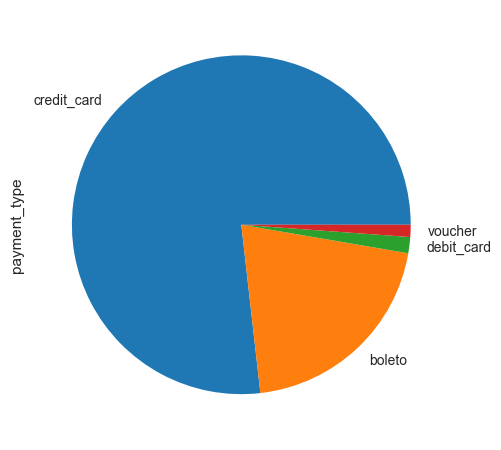

In [25]:
(orders_data['payment_type'].value_counts()*100/len(orders_data)).plot.pie()

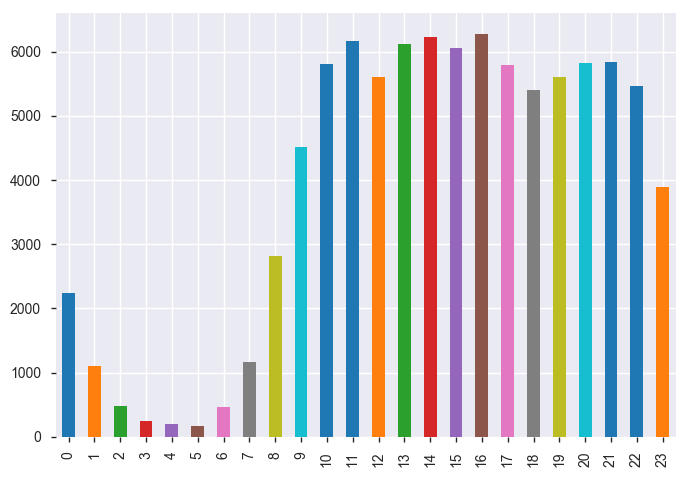

In [26]:
orders_data['purchase_hour'].value_counts().sort_index().plot.bar()

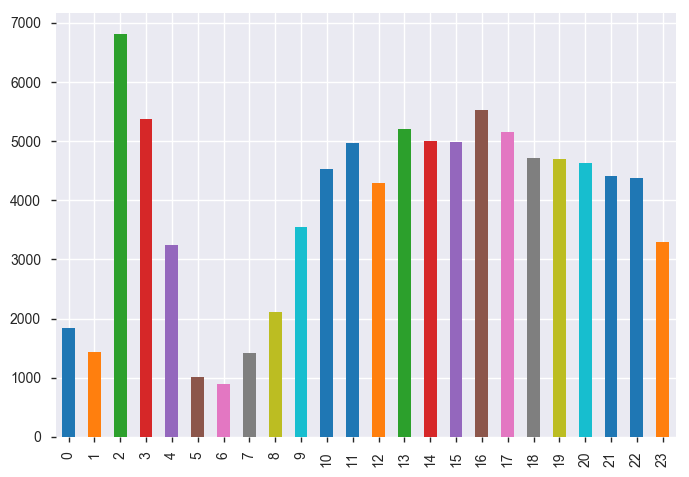

In [27]:
orders_data['approval_hour'].value_counts().sort_index().plot.bar()

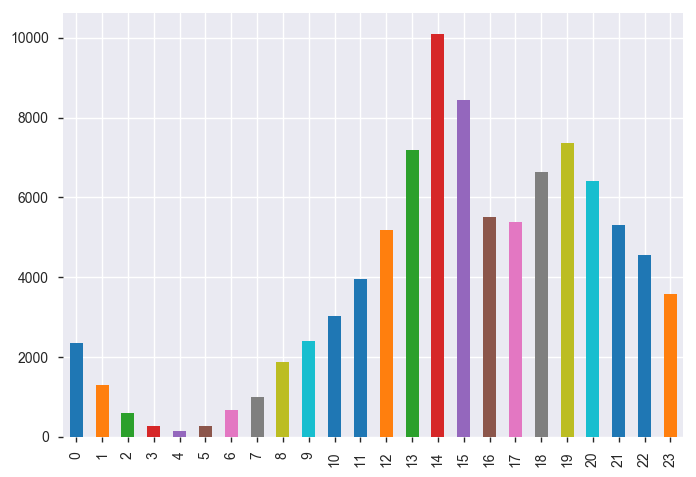

In [28]:
orders_data['carrier_handover_hour'].value_counts().sort_index().plot.bar()

In [29]:
approval_hour

NameError: name 'approval_hour' is not defined

In [ ]:
orders_data['customer_handover_hour'].value_counts().sort_index().plot.bar()

In [ ]:
orders_data['customer_state'].value_counts().plot.bar()

In [ ]:
orders_data['order_purchase_timestamp'].dt.year.value_counts().sort_index().plot.pie()

In [ ]:
orders_data[orders_data['order_purchase_timestamp'].dt.year == 2016]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()


In [ ]:
orders_data[orders_data['order_approved_at'].dt.year == 2016]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()


In [ ]:
orders_data[orders_data['order_delivered_carrier_date'].dt.year == 2016]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()


In [ ]:
orders_data[orders_data['order_delivered_customer_date'].dt.year == 2016]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_purchase_timestamp'].dt.year == 2017]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_approved_at'].dt.year == 2017]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_delivered_carrier_date'].dt.year == 2017]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_delivered_customer_date'].dt.year == 2017]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_purchase_timestamp'].dt.year == 2018]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_approved_at'].dt.year == 2018]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_delivered_carrier_date'].dt.year == 2018]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
orders_data[orders_data['order_delivered_customer_date'].dt.year == 2018]['order_purchase_timestamp'].dt.month.value_counts().sort_index().plot.bar()

In [ ]:
(orders_data['order_approval_sec']/3600).value_counts().sort_index().plot.line()

In [ ]:
(orders_data['seller_to_carrier_sec']/3600).value_counts().sort_index().loc[5:].plot.line()

In [ ]:
(orders_data['carrier_to_customer_sec']/3600).value_counts().sort_index().loc[5:].plot.line()

In [ ]:
orders_data.columns

In [ ]:
orders_data[['payment_installments', 'payment_value']].plot.scatter(x='payment_installments', y='payment_value')

In [ ]:
sns.pairplot(orders_data[['payment_type','payment_installments', 'payment_value', 'order_approval_sec', 'seller_to_carrier_sec', 'carrier_to_customer_sec', 'early_delivery_sec', 'purchase_to_delivery_sec', 'purchase_hour', 'approval_hour', 'carrier_handover_hour', 'customer_handover_hour']], hue='payment_type', diag_kind='hist')